This project use inflation data of clothes and footwear category in Indonesia.

Datasets were collected from <a href="https://www.bps.go.id/indicator/3/1894/4/inflasi-2018-100-menurut-kelompok-dan-sub-kelompok-02-pakaian-dan-alas-kaki.html"> Statistics Indonesia (BPS) </a>

The data that available starts from 2020 to 2023

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import string


In [2]:
DATASET_DIR_PATH = 'dataset/'

In [3]:
dataset_paths = [DATASET_DIR_PATH+fileName for fileName in os.listdir(DATASET_DIR_PATH)]
dataset_paths

['dataset/2020.xlsx',
 'dataset/2021.xlsx',
 'dataset/2022.xlsx',
 'dataset/2023.xlsx',
 'dataset/additional']

In [4]:
def rename_df_cols(df):
    column_mapping = {
        **{col: col.replace('.1', '') for col in df.columns},
        **{'Unnamed: 0': 'Kota'}
    }

    df = df.rename(
        columns=column_mapping
    )
    
    return df

In [5]:
def read_df(path):
    df = pd.read_excel(
        dataset_paths[0], 
        engine='openpyxl',
        usecols='a, o:z', # get clothes data only
        skiprows=[0,1,2,94,95,96,97,98], # skip unused data
    )
    
    df = rename_df_cols(df)
    
    # in order to make df structure consice
    # I decided to add year column
    df['Tahun'] = path.split('/')[1][:4]
    
    return df

In [6]:
# read all ds as dataframe
# return combined of those dataframes

def get_combined_df(dataset_paths):
    final_df = read_df(dataset_paths[0])
    
    for path in dataset_paths[1:]:
        df = read_df(path)
        
        # merge dataframe
        final_df = final_df.merge(
            df,
#             on=final_df.columns,
            how='outer'
        )
        
    return final_df

In [7]:
df = get_combined_df(dataset_paths)
df.head()

,Kota,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahun
0,KOTA MEULABOH,-0.24,0.01,-0.11,0.00,-0.19,0.02,0.15,0.32,0.00,0.00,0.01,0.00,2020
1,KOTA BANDA ACEH,0.62,0.13,0.03,0.00,-0.03,0.00,0.00,0.00,0.00,0.00,-0.13,0.00,2020
2,KOTA LHOKSEUMAWE,0.00,1.32,0.00,0.18,0.97,0.00,0.31,0.00,0.00,0.00,0.00,0.00,2020
3,KOTA SIBOLGA,0.11,0.17,0.22,0.00,0.82,0.82,0.32,0.03,0.00,0.11,0.45,5.33,2020
4,KOTA PEMATANG SIANTAR,-0.12,0.06,0.18,0.00,-0.12,0.00,0.00,0.00,0.04,0.05,0.00,0.02,2020


# EDA

## Data cleaning

### na data inspection

In [8]:
df.isna().sum()

Kota         0
Januari      0
Februari     0
Maret        0
April        0
Mei          0
Juni         0
Juli         0
Agustus      0
September    0
Oktober      0
November     0
Desember     0
Tahun        0
dtype: int64

### remove word kota in Kota Coulmn

In [9]:
df['Kota'].tail()

445        MANOKWARI
446      KOTA SORONG
447          MERAUKE
448           TIMIKA
449    KOTA JAYAPURA
Name: Kota, dtype: object

In [10]:
df['Kota'] = df['Kota'].apply(lambda kota: string.capwords(kota).replace('Kota ', ''))
df['Kota'].tail()

445    Manokwari
446       Sorong
447      Merauke
448       Timika
449     Jayapura
Name: Kota, dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Kota       450 non-null    object 
 1   Januari    450 non-null    float64
 2   Februari   450 non-null    float64
 3   Maret      450 non-null    float64
 4   April      450 non-null    float64
 5   Mei        450 non-null    float64
 6   Juni       450 non-null    float64
 7   Juli       450 non-null    float64
 8   Agustus    450 non-null    float64
 9   September  450 non-null    float64
 10  Oktober    450 non-null    float64
 11  November   450 non-null    float64
 12  Desember   450 non-null    float64
 13  Tahun      450 non-null    object 
dtypes: float64(12), object(2)
memory usage: 49.3+ KB


> The dataset contains inflation in 90 cities across all provincies in Indonesia. The inflation grouped by month

## Data preprocessing

### add province column

In [12]:
province_city_dict = pd.read_excel(
    'dataset/additional/city-province-island.xlsx',
    engine='openpyxl',
    index_col=0
)['Provinsi'].to_dict()

province_city_dict

{'Meulaboh': 'Aceh',
 'Banda Aceh': 'Aceh',
 'Lhokseumawe': 'Aceh',
 'Sibolga': 'Sumatera Utara',
 'Pematang Siantar': 'Sumatera Utara',
 'Medan': 'Sumatera Utara',
 'Padangsidimpuan': 'Sumatera Utara',
 'Gunungsitoli': 'Sumatera Utara',
 'Padang': 'Sumatera Barat',
 'Bukittinggi': 'Sumatera Barat',
 'Tembilahan': 'Riau',
 'Pekanbaru': 'Riau',
 'Dumai': 'Riau',
 'Bungo': 'Jambi',
 'Jambi': 'Jambi',
 'Palembang': 'Sumatera Selatan',
 'Lubuklinggau': 'Sumatera Selatan',
 'Bengkulu': 'Bengkulu',
 'Bandar Lampung': 'Lampung',
 'Metro': 'Lampung',
 'Tanjung Pandan': 'Kepulauan Bangka Belitung',
 'Pangkal Pinang': 'Kepulauan Bangka Belitung',
 'Batam': 'Kepulauan Riau',
 'Tanjung Pinang': 'Kepulauan Riau',
 'Dki Jakarta': 'Daerah Khusus Ibukota Jakarta',
 'Bogor': 'Jawa Barat',
 'Sukabumi': 'Jawa Barat',
 'Bandung': 'Jawa Barat',
 'Cirebon': 'Jawa Barat',
 'Bekasi': 'Jawa Barat',
 'Depok': 'Jawa Barat',
 'Tasikmalaya': 'Jawa Barat',
 'Cilacap': 'Jawa Tengah',
 'Purwokerto': 'Jawa Tengah',
 '

In [13]:
df['Provinsi'] = df['Kota'].apply(lambda city: province_city_dict[city])
df[['Kota', 'Provinsi']].head()

,Kota,Provinsi
0,Meulaboh,Aceh
1,Banda Aceh,Aceh
2,Lhokseumawe,Aceh
3,Sibolga,Sumatera Utara
4,Pematang Siantar,Sumatera Utara


### add island column

In [14]:
province_island_dict = pd.read_excel(
    'dataset/additional/city-province-island.xlsx',
    engine='openpyxl',
    index_col=1
)['Pulau'].to_dict()
province_island_dict

{'Aceh': 'Sumatra',
 'Sumatera Utara': 'Sumatra',
 'Sumatera Barat': 'Sumatra',
 'Riau': 'Sumatra',
 'Jambi': 'Sumatra',
 'Sumatera Selatan': 'Sumatra',
 'Bengkulu': 'Sumatra',
 'Lampung': 'Sumatra',
 'Kepulauan Bangka Belitung': 'Kepulauan Bangka Belitung',
 'Kepulauan Riau': 'Kepulauan Riau',
 'Daerah Khusus Ibukota Jakarta': 'Jawa',
 'Jawa Barat': 'Jawa',
 'Jawa Tengah': 'Jawa',
 'Daerah Istimewa Yogyakarta': 'Jawa',
 'Jawa Timur': 'Jawa',
 'Banten': 'Jawa',
 'Bali': 'Bali',
 'Nusa Tenggara Barat': 'Nusa Tenggara Barat',
 'Nusa Tenggara Timur': 'Nusa Tenggara Timur',
 'Kalimantan Barat': 'Kalimantan',
 'Kalimantan Tengah': 'Kalimantan',
 'Kalimantan Selatan': 'Kalimantan',
 'Kalimantan Timur': 'Kalimantan',
 'Kalimantan Utara': 'Kalimantan',
 'Sulawesi Utara': 'Sulawesi',
 'Sulawesi Tengah': 'Sulawesi',
 'Sulawesi Selatan': 'Sulawesi',
 'Sulawesi Tenggara': 'Sulawesi',
 'Gorontalo': 'Sulawesi',
 'Sulawesi Barat': 'Sulawesi',
 'Maluku': 'Maluku',
 'Maluku Utara': 'Maluku',
 'Papua Ba

In [15]:
df['Pulau'] = df['Provinsi'].apply(lambda province: province_island_dict[province])
df[['Provinsi', 'Pulau']].head()

,Provinsi,Pulau
0,Aceh,Sumatra
1,Aceh,Sumatra
2,Aceh,Sumatra
3,Sumatera Utara,Sumatra
4,Sumatera Utara,Sumatra


## Data type inspection

In [16]:
df.dtypes

Kota          object
Januari      float64
Februari     float64
Maret        float64
April        float64
Mei          float64
Juni         float64
Juli         float64
Agustus      float64
September    float64
Oktober      float64
November     float64
Desember     float64
Tahun         object
Provinsi      object
Pulau         object
dtype: object

> Columns that need a data type conversions are:
- Tahun -> category
- Provinsi -> category
- Pulau -> category

### data type conversion

In [17]:
df[['Tahun', 'Provinsi', 'Pulau']] = df[['Tahun', 'Provinsi', 'Pulau']].astype('category')
df[['Tahun', 'Provinsi', 'Pulau']].dtypes

Tahun       category
Provinsi    category
Pulau       category
dtype: object

## Data Exploration

### questions

To explore the dataset effectively, I will define some questions to answer:

- What is the overall monthly inflation trend in Indonesia from 2020 to 2023?

## Visualization

In [18]:
df.describe()

,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,0.126778,0.117333,0.154000,0.028667,0.150889,0.097111,0.128556,0.108000,-0.015333,0.032889,0.120000,0.128444
std,0.292531,0.409214,0.358706,0.104968,0.581758,0.721634,0.365358,0.294074,0.478351,0.334951,0.293182,0.601666
min,-0.410000,-2.270000,-0.400000,-0.340000,-1.620000,-4.490000,-1.230000,-0.570000,-4.140000,-1.470000,-0.310000,-1.110000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000
50%,0.025000,0.045000,0.015000,0.000000,0.000000,0.015000,0.065000,0.015000,0.000000,0.010000,0.030000,0.010000
75%,0.150000,0.270000,0.220000,0.020000,0.310000,0.140000,0.270000,0.100000,0.060000,0.120000,0.140000,0.180000
max,1.320000,1.390000,1.940000,0.450000,2.050000,3.820000,1.410000,1.920000,0.790000,0.880000,1.930000,5.330000


{'whiskers': [<matplotlib.lines.Line2D at 0x2021cbb2790>,
 'caps': [<matplotlib.lines.Line2D at 0x2021cbb2cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2021cbb24f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2021cbbe250>],
 'fliers': [<matplotlib.lines.Line2D at 0x2021cbbe4f0>],
 'means': []}

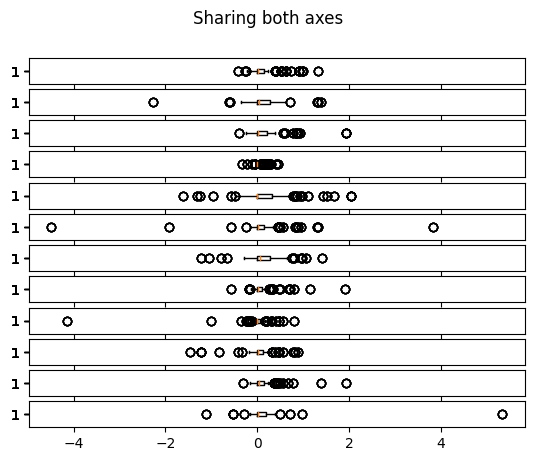

In [19]:
fig, axs = plt.subplots(12, sharex=True, sharey=True)
fig.suptitle('Sharing both axes')
axs[0].boxplot(df['Januari'], vert=False)
axs[1].boxplot(df['Februari'], vert=False)
axs[2].boxplot(df['Maret'], vert=False)
axs[3].boxplot(df['April'], vert=False)
axs[4].boxplot(df['Mei'], vert=False)
axs[5].boxplot(df['Juni'], vert=False)
axs[6].boxplot(df['Juli'], vert=False)
axs[7].boxplot(df['Agustus'], vert=False)
axs[8].boxplot(df['September'], vert=False)
axs[9].boxplot(df['Oktober'], vert=False)
axs[10].boxplot(df['November'], vert=False)
axs[11].boxplot(df['Desember'], vert=False)